In [121]:
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, f1_score, accuracy_score, confusion_matrix, precision_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer


# nltk
import nltk
from nltk.corpus import stopwords, brown
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
from wordcloud import WordCloud
# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import re
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nasim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [95]:
#read the dataset
df = pd.read_csv('C:\\Users\\nasim\\Documents\\Moradul Siddique\\data\\Twitter Sentiment Analysis.csv', encoding = 'latin', header=None)

In [96]:
print("Dataset size:", len(df))

Dataset size: 1600000


In [97]:
df.head(10)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [98]:
df = df.rename(columns={0: 'label', 1: 'id', 2: 'date', 3: 'query', 4: 'username', 5: 'text'})

In [99]:
df

,label,id,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


#Map target label to String

0 -> NEGATIVE
2 -> NEUTRAL
4 -> POSITIVE

Pre-Process the dataset

In [100]:
#Dropping unnecessary columns
df.drop(['id','date','query','username'], axis=1, inplace=True)

In [101]:
df

,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [102]:
value_freq = df['label'].value_counts()
print(value_freq)

4    800000
0    800000
Name: label, dtype: int64


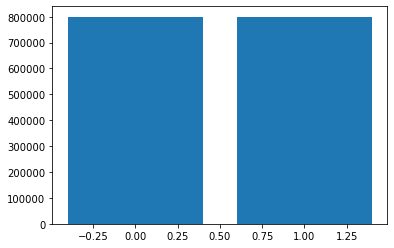

In [103]:
aux = plt.bar(x = [0,1], height = value_freq, )
plt.show()

The Preprocessing steps taken are:

**Lower Casing**: Each text is converted to lowercase.

**Replacing URLs**: Links starting with "http" or "https" or "www" are replaced by "URL".

**Replacing Emojis**: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")

**Replacing Usernames**: Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER")

**Removing Non-Alphabets**: Replacing characters except Digits and Alphabets with a space.

**Removing Consecutive letters**: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")

**Removing Short Words**: Words with length less than 2 are removed.

**Removing Stopwords**: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored **without sacrificing the meaning of the sentence. (eg: "the", "he", "have")

**Lemmatizing**: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)

In [114]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [115]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [116]:
# Storing data in lists.
text, sentiment = list(df['text']), list(df['label'])

In [117]:
import time
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 98 seconds


In [119]:
processedtext

['USER URL aww that bummer you shoulda got david carr of third day to do it EMOJIwink ',
 'is upset that he can update his facebook by texting it and might cry a result school today also blah ',
 'USER dived many time for the ball managed to save 50 the rest go out of bound ',
 'my whole body feel itchy and like it on fire ',
 'USER no it not behaving at all mad why am here because can see you all over there ',
 'USER not the whole crew ',
 'need hug ',
 'USER hey long time no see yes rain bit only bit lol fine thanks how you ',
 'USER nope they didn have it ',
 'USER que me muera ',
 'spring break in plain city it snowing ',
 'just re pierced my ear ',
 'USER couldn bear to watch it and thought the ua loss wa embarrassing ',
 'USER it it count idk why did either you never talk to me anymore ',
 'USER would ve been the first but didn have gun not really though zac snyder just doucheclown ',
 'USER wish got to watch it with you miss you and USER how wa the premiere ',
 'hollis death sce

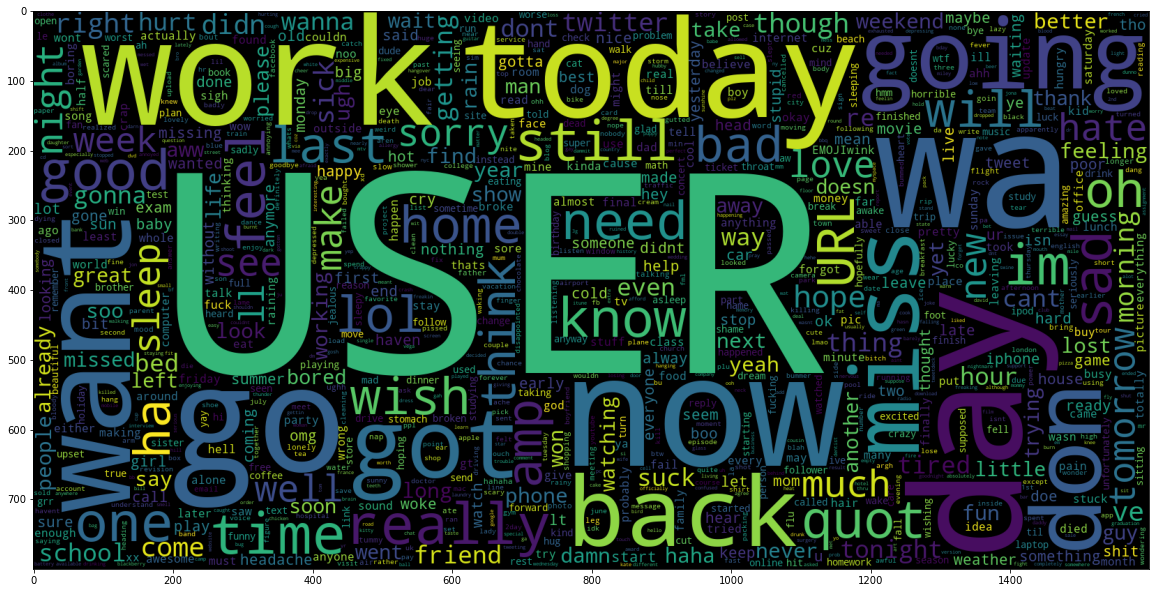

In [122]:
data_neg = processedtext[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [84]:
corpus = []
for i in range(df.shape[0]):
    corpus.append(preprocess(df['text'][i]))

In [85]:
#Creating bag of words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tf = TfidfVectorizer(ngram_range = (1,2), stop_words= ['http', 'appl','aapl', 'co', 'tweet', 'rt','amp', 'iphon'], max_features = 1500)

In [123]:
# fitting and creating the transformation of corpus to array
tf.fit(set(corpus))
X = tf.transform(corpus).toarray()
y = df['label'].values
y

MemoryError: Unable to allocate 17.9 GiB for an array with shape (1600000, 1500) and data type float64

In [ ]:
#Creating word cloud

bag_of_words = tf.get_feature_names()


In [ ]:
pos_tweet = X[y == 4]
neg_tweet = X[y == 0]